In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Required Libraries

In [ ]:
!pip install torch torchvision opencv-python
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2.
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 8.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15792, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 15792 (delta 15), reused 31 (delta 10), pack-reused 15743 (from 1)
Receiving objects: 100% (15792/15792), 6.36 MiB | 10.04 MiB/s, done.
Resolving deltas: 100% (11511/11511), done.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.9 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=5bd03c97b56fbc6a88a0166a331209f8cd72974d014d6bbdb6b0afa516297186
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


Load Pre-trained Mask R-CNN

In [ ]:
import torch
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
import cv2

# Set up configuration for Mask R-CNN (pre-trained on COCO dataset)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for detection

# Initialize predictor
predictor = DefaultPredictor(cfg)


model_final_f10217.pkl: 178MB [00:01, 94.9MB/s]                          


Perform Segmentation on Food Images

Loading image from: /content/drive/MyDrive/Designproject/Implementation/Dataset/test_set/test_000022.jpg
Image loaded successfully.
Running predictor on the image...


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Visualizing the result...
Displaying the segmented image...


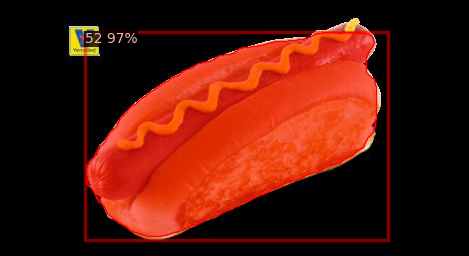

In [ ]:
# Load a sample food image
image_path = '/content/drive/MyDrive/Designproject/Implementation/Dataset/test_set/test_000022.jpg'
print(f"Loading image from: {image_path}")
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    print("Image loaded successfully.")

# Run the image through the predictor (Mask R-CNN)
print("Running predictor on the image...")
outputs = predictor(image)

# Visualize the result
print("Visualizing the result...")
v = Visualizer(image[:, :, ::-1])
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Use cv2_imshow instead of cv2.imshow for Google Colab
from google.colab.patches import cv2_imshow
print("Displaying the segmented image...")
cv2_imshow(out.get_image()[:, :, ::-1])


Extract Mask for Portion Estimation

In this step, we will use the predictor to perform instance segmentation on food images. The goal is to detect regions of the food portions.

In [ ]:
import numpy as np

# Extract predicted masks
masks = outputs['instances'].pred_masks.cpu().numpy()

# Iterate through each mask and calculate the pixel area
for i, mask in enumerate(masks):
    portion_size = np.sum(mask)  # Sum the True pixels in the mask
    print(f"Estimated portion size (in pixels) for food item {i + 1}: {portion_size}")


Estimated portion size (in pixels) for food item 1: 38367


Manually Associate Calories with Each Class
For each of the 251 food classes, you will manually associate a calories-per-gram value. For example:

Class: "Pasta"  Calories per gram: 1.2 kcal/g
Class: "Pizza"  Calories per gram: 2.8 kcal/g
Class: "Salad"  Calories per gram: 0.5 kcal/g

In [ ]:
import pandas as pd
food_estimates_path = '/content/drive/MyDrive/Designproject/Implementation/Dataset/food_estimates.csv'
food_estimates_df = pd.read_csv(food_estimates_path)

In [ ]:

# Convert the CSV data into a dictionary for easy lookup
calories_per_gram = {}
for _, row in food_estimates_df.iterrows():
    food_class = row['Predicted Food Class']
    estimated_portion_size = float(row['Estimated Portion Size'].split()[0])  # Extract grams

    # Remove any non-numeric characters from the calorie value and convert to float
    calories = float(''.join(filter(str.isdigit, row['Estimated Calories'])))
    calories_per_gram[food_class] = calories / estimated_portion_size  # Cal per gram


Estimate Portion Size in Grams

Once you have the portion size (in pixels), you need to convert it into an estimated weight. Since we don't have a reference object for scaling, we can estimate based on pixel-to-gram calibration.

Example Calibration:
Assume 10,000 pixels = 100g of food. This value can be adjusted based on visual inspection or if you manage to get a small labeled dataset with actual portions.

In [ ]:
pixel_to_gram_ratio = 100 / 10000  # 100g for 10,000 pixels (adjustable)

# Estimate portion size for each mask in grams
for i, mask in enumerate(masks):
    portion_size_in_pixels = np.sum(mask)
    portion_size_in_grams = portion_size_in_pixels * pixel_to_gram_ratio
    print(f"Estimated portion size for food item {i + 1}: {portion_size_in_grams:.2f} grams")


Estimated portion size for food item 1: 383.67 grams


Predict Calorie Content

Now, combine the portion size (in grams) with the manually assigned calorie density for the predicted food class (from ViT).

In [ ]:
# Assume the predicted food class is "Pasta"
predicted_class = "Samosa"

# Get the calorie density for the predicted class
calories_per_gram_for_class = calories_per_gram[predicted_class]

# Calculate the total calories
for i, mask in enumerate(masks):
    portion_size_in_pixels = np.sum(mask)
    portion_size_in_grams = portion_size_in_pixels * pixel_to_gram_ratio
    total_calories = portion_size_in_grams * calories_per_gram_for_class
    print(f"Estimated calories for food item {i + 1}: {total_calories:.2f} kcal")


Estimated calories for food item 1: 1181.70 kcal


 Calibrate Pixel-to-Gram Ratio

In [ ]:
# Define a pixel-to-gram conversion ratio
pixel_to_gram_ratio = 100 / 10000  # 100g = 10,000 pixels

# Calculate portion size in grams
for i, mask in enumerate(masks):
    portion_size_in_pixels = np.sum(mask)
    portion_size_in_grams = portion_size_in_pixels * pixel_to_gram_ratio
    print(f"Estimated portion size for food item {i+1}: {portion_size_in_grams:.2f} grams")


Estimated portion size for food item 1: 383.67 grams


# **our project overview**

> Add blockquote




**Food Classification with ViT:**

ViT predicts the food class from the input image (e.g., "Pasta").


**Portion Segmentation with Mask R-CNN:**

Mask R-CNN segments the food portion in the image.

The portion size is estimated by counting the number of pixels in the segmentation mask.


**Calorie Prediction:**

You have a calories-per-gram dictionary for each of the 251 food classes.

The portion size (in grams) is calculated by using a pixel-to-gram conversion ratio.

**Finally,** next the total calorie content is estimated by multiplying the portion size by the corresponding calorie density for the predicted food class.